<h1><b> The Sparks Foundation </b></h1>
<h2><b>Author: Anu Rithiga B<br><br>Object Detection</b></h2><br>
<h3><b>Task 1 in IOT and Computer Vision </b>: Implement an object detector which identifies the classes of the objects in
an image or video.<br><br>
<b>Date</b>: 17/7/2021

<b>Downloading the API from its source repository.

In [ ]:
!git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 2802, done.
remote: Counting objects: 100% (2802/2802), done.
remote: Compressing objects: 100% (2336/2336), done.
remote: Total 2802 (delta 716), reused 1284 (delta 430), pack-reused 0
Receiving objects: 100% (2802/2802), 32.79 MiB | 29.30 MiB/s, done.
Resolving deltas: 100% (716/716), done.


<b> Installing dependencies 

In [ ]:
 %%bash
 sudo apt install -y protobuf-compiler
 # change directory
 cd models/research/
 protoc object_detection/protos/*.proto --python_out=.
 cp object_detection/packages/tf2/setup.py .
 # install dependencies
 python -m pip install . 

Reading package lists...
Building dependency tree...
Reading state information...
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1658741 sha256=077c10dd80e19bf3f917243f266201073b160eee41ef607038d1e2cec00577e7
  Stored in directory: /tmp/pip-ephem-wheel-cache-9uhrw5lh/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
  Created wheel for avro-python3: filename=avro_python3-1.10.2-cp37-none-any.whl size=44011 sha256=aa61953c12c823487a3bccf5c6905b942782cea1dff7678ff4881b7c73ec4ce7
  Stored in directory: /root/.cache/pip/wheels/ee/ee/18/c466221ca6900e3efce2f4ea9c329288808679aecdcb2838d3
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491070 sha256=924daa22789a46bef8506c94a2ac70e120fbb2c765ff320d75aa510a72ed2ca3
  Stored in directory: /root/



ERROR: multiprocess 0.70.12.2 has requirement dill>=0.3.4, but you'll have dill 0.3.1.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.26.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: apache-beam 2.31.0 has requirement avro-python3!=1.9.2,<1.10.0,>=1.8.1, but you'll have avro-python3 1.10.2 which is incompatible.


<b> Creating the environment 

In [ ]:
 import matplotlib
 import matplotlib.pyplot as plt
 import cv2
 import numpy as np
 import tensorflow as tf
 import tensorflow_hub as hub

 from object_detection.utils import label_map_util
 from object_detection.utils import visualization_utils as viz_utils
 from object_detection.utils import ops as utils_ops
 %matplotlib inline 
 

<b>Prepare EfficientDet Model <br>
Loading the pre-trained model with weights from the TensorFlow Hub.



In [ ]:
 model_url = 'https://tfhub.dev/tensorflow/efficientdet/d0/1'
 efficientdet = hub.load(model_url)

<b>Preparing some Data for Inference

In [ ]:
!git clone https://github.com/RajkumarGalaxy/dataset.git

Cloning into 'dataset'...
remote: Enumerating objects: 216, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 216 (delta 6), reused 0 (delta 0), pack-reused 194
Receiving objects: 100% (216/216), 31.63 MiB | 23.66 MiB/s, done.
Resolving deltas: 100% (59/59), done.


<b> Reading the images 

Reading the images and save them in the required format in a list. EfficientDet receives input images in the shape of [1, 512, 512, 3]. It does not support batching. It receives images one by one. The shape supported by our version is 512 by 512 pixels. There are other versions of EfficientDet that support 640 by 640, 768 by 768, 1024 by 1024, and so on. Each image should be in 3 colour channels. If a grayscale image is used, it should be modified to the required shape format.

In [ ]:
images = []
 # Read 10 images from the downloaded dataset
for i in range(1,11):
     url = './dataset/Images/%03d.jpg'%i
     img = cv2.imread(url)
     # cv2 reads image in BGR format
     # convert BGR into RGB
     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
     # EfficientDet expects 512 by 512
     img = tf.image.resize(img, (512,512))
     # EfficientDet expects uint8
     img = tf.cast(img, tf.uint8)
     # EffiencientDet expects [1,512,512,3]
     img = tf.expand_dims(img, axis=0)
     images.append(img)

<b> Shape of the image

In [ ]:
images[0].shape

TensorShape([1, 512, 512, 3])

<b>Sample of an image and its visualization 

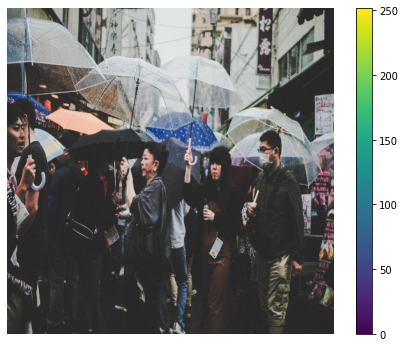

In [ ]:
 img = images[0].numpy().reshape(512,512,3)
 plt.figure(figsize=(8,6))
 plt.imshow(img)
 plt.axis('off')
 plt.colorbar()
 plt.show()

<b> Visualization of all the images. The dataset holds 10 images 

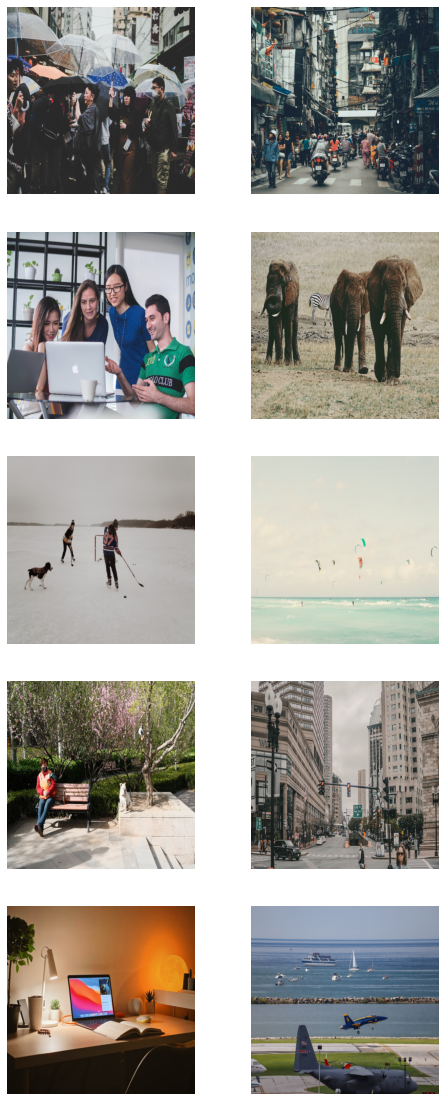

In [ ]:
 plt.figure(figsize=(8,20))
 for i in range(10):
     img = images[i].numpy().reshape(512,512,3)
     plt.subplot(5,2,i+1)
     plt.imshow(img)
     plt.axis('off')
 plt.show()

<b>Inference – Object Detection <br>
Perform inference with the EfficientDet Model on the pre-processed image data.

In [ ]:
 results = []
 # infer and save results in a list
 for i in range(10):
     res = efficientdet(images[i])
     results.append(res)
 # what results do we obtain?
 results[0].keys()

dict_keys(['detection_scores', 'raw_detection_scores', 'num_detections', 'raw_detection_boxes', 'detection_boxes', 'detection_multiclass_scores', 'detection_classes', 'detection_anchor_indices'])

In [ ]:
 label = './models/research/object_detection/data/mscoco_label_map.pbtxt'
 category = label_map_util.create_category_index_from_labelmap(label, 
                                     use_display_name=True)

<b>Visualizing Object Detection Results

Defining a helper function that displays the input images and results on top of them. The bounding boxes, locations, class name, and colour are extracted from the results and displayed as images. 

In [ ]:
def display_detections(image, result):
     result = {key:val.numpy() for key,val in result.items()}
     viz_utils.visualize_boxes_and_labels_on_image_array(
       image,
       result['detection_boxes'][0],
       result['detection_classes'][0].astype(int),
       result['detection_scores'][0],
       category,
       use_normalized_coordinates=True,
       max_boxes_to_draw=200,
       min_score_thresh=.30,
       agnostic_mode=False,
       keypoints=None,
       keypoint_scores=None,
       keypoint_edges=None)
     plt.figure(figsize=(10,10))
     plt.imshow(image)
     plt.axis('off')
     plt.show() 
     

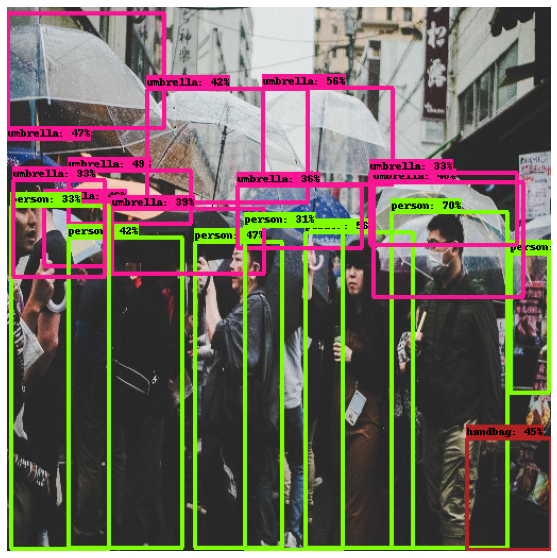

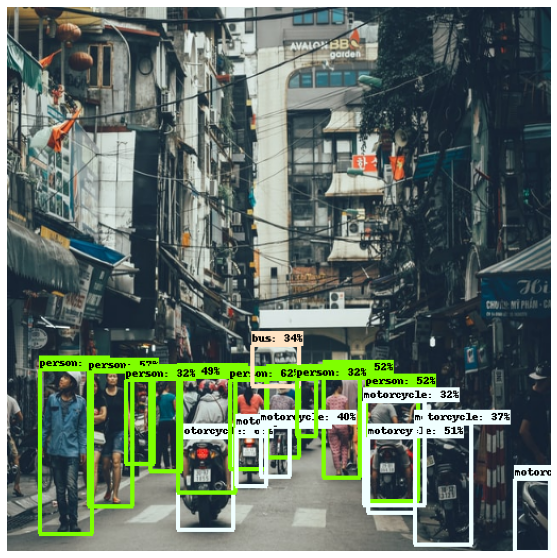

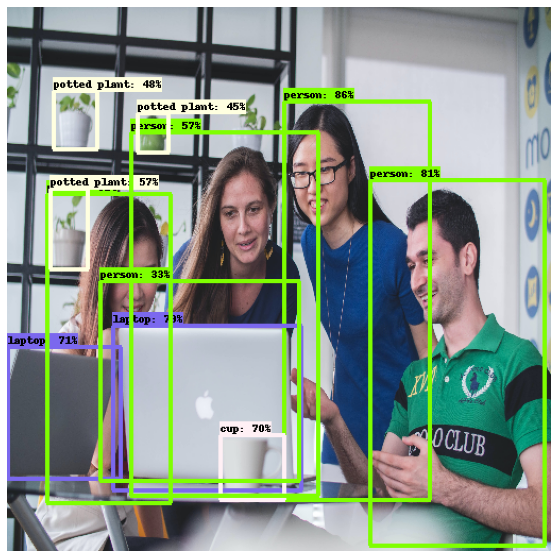

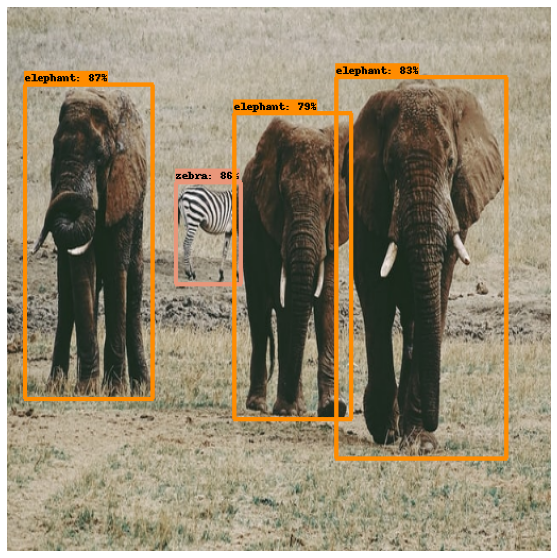

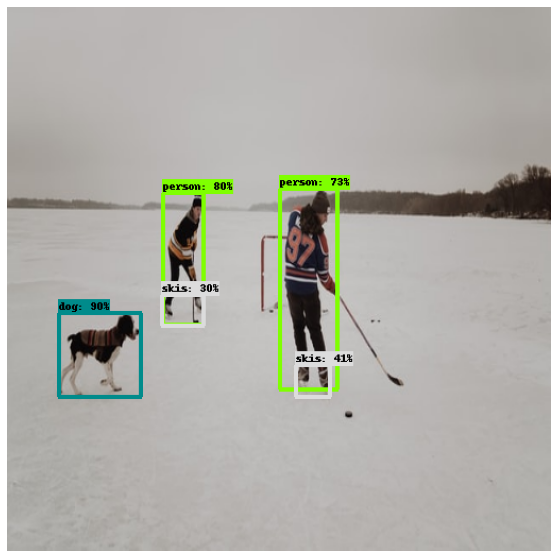

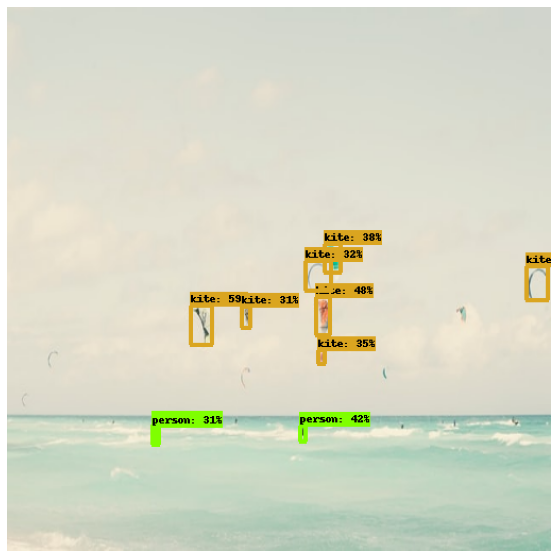

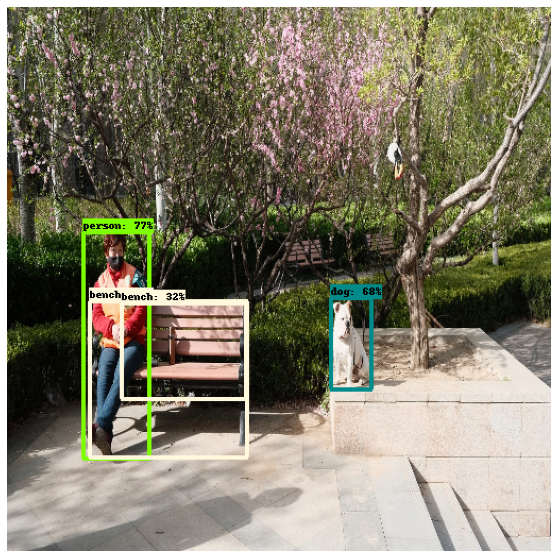

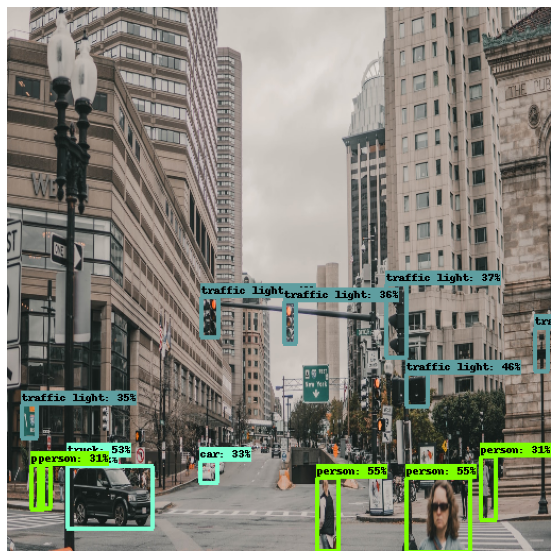

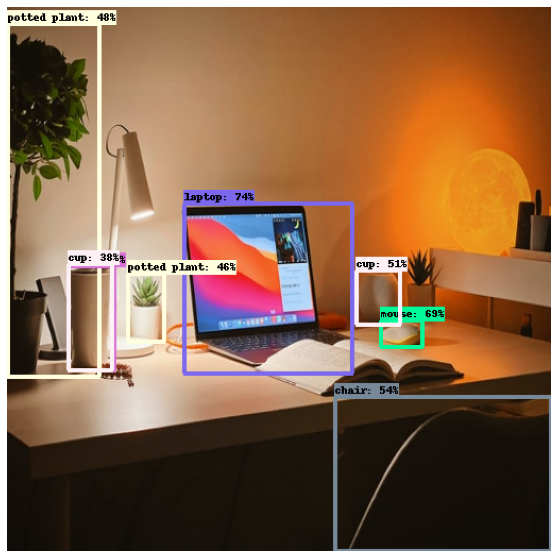

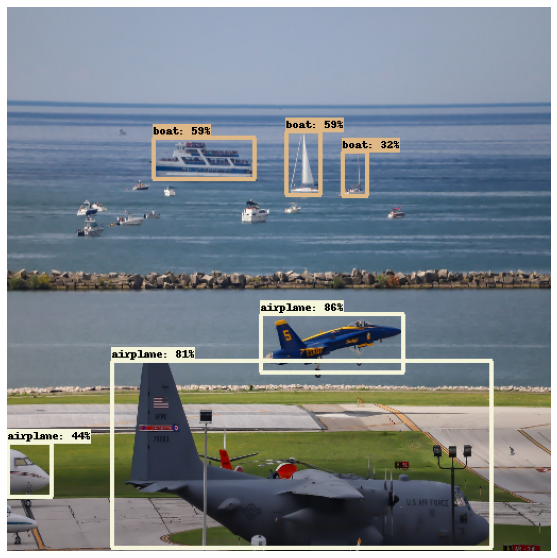

In [ ]:
 for i in range(10):
     img = images[i].numpy().copy()[0]
     res = results[i]
     display_detections(img, res) 

<b><h1>Thank You!! Have a good day 